In [2]:
d1 = pd.read_csv("AMZN.csv")
d2 = pd.read_csv("FB.csv")
d3 = pd.read_csv("WMT.csv")
d4 = pd.read_csv("AXP.csv")
d5 = pd.read_csv("SQ.csv")
d6 = pd.read_csv("DNB.csv")
d7 = pd.read_csv("PFE.csv")

In [3]:
d = pd.DataFrame(d1.set_index('Date')['Close']).join(pd.DataFrame(d2.set_index('Date')['Close']), how='inner',lsuffix='AMZN', rsuffix='FB')

In [4]:
d = d.join(pd.DataFrame(d3.set_index('Date')['Close']), how='inner')

In [5]:
p = pd.DataFrame(d4.set_index('Date')['Close']).join(pd.DataFrame(d5.set_index('Date')['Close']), how='inner',lsuffix='AXP', rsuffix='SQ')

In [6]:
p = p.join(pd.DataFrame(d6.set_index('Date')['Close']), how='inner')

In [7]:
p = p.join(pd.DataFrame(d7.set_index('Date')['Close']), how='inner', lsuffix='DNB')

In [8]:
d.columns=['AMZN','FB','WMT']
p.columns=['AXP','SQ','DNB','PFE']

In [9]:
d.isnull().sum()

AMZN    0
FB      0
WMT     0
dtype: int64

In [10]:
p.isnull().sum()

AXP    0
SQ     0
DNB    0
PFE    0
dtype: int64

In [11]:
d.to_csv("all_B2C_stocks.csv",index=True)
p.to_csv("all_B2B_stocks.csv",index=True)

In [310]:
t = []
for i in range(0,d.shape[0],175):
    t.append(d['Date'][i].split()[0])

In [311]:
t

['2012-05-18',
 '2013-01-31',
 '2013-10-10',
 '2014-06-23',
 '2015-03-04',
 '2015-11-10',
 '2016-07-22',
 '2017-04-03',
 '2017-12-11']

In [284]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [312]:
d = pd.read_csv("final5Stocks.csv")

In [317]:
gs = gridspec.GridSpec(17,45)

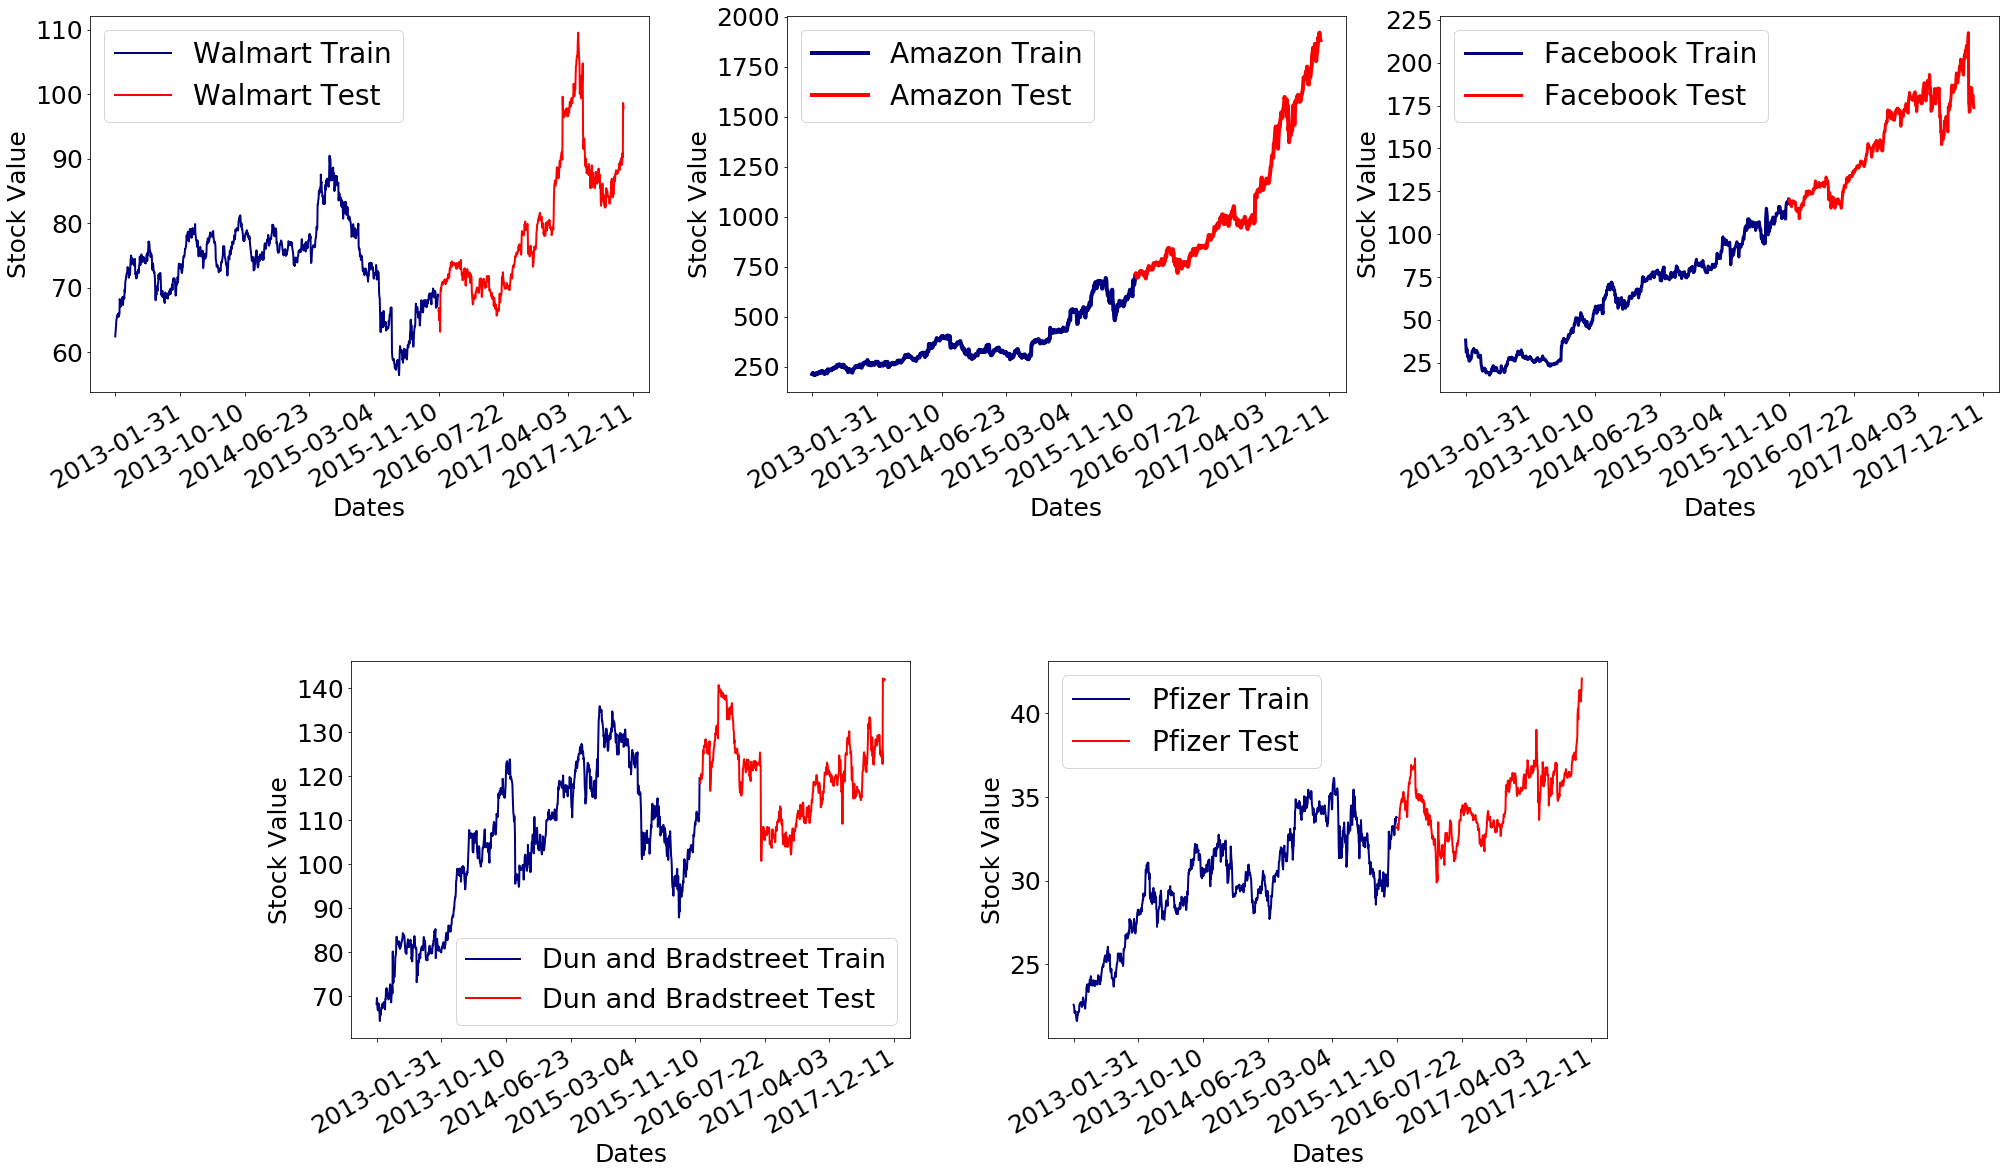

In [319]:
fig = plt.figure(figsize=(35,20))

ax1 = plt.subplot(gs[:6,:13])
ax1.plot(d['WMT'][:1000],linewidth=2,color='navy',label='Walmart Train')
ax1.plot(d['WMT'][1000:],linewidth=2,color='red',label='Walmart Test')
ax1.legend(fontsize=28)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
ax1.xaxis.set_major_locator(plt.MaxNLocator(9))
ax1.set_xticklabels(t, rotation=30)
ax1.set_xlabel("Dates", fontsize=25)
ax1.set_ylabel("Stock Value", fontsize=25)

ax2 = plt.subplot(gs[:6,16:29])
ax2.plot(d['AMZN'][:1000],linewidth=4,color='navy',label='Amazon Train')
ax2.plot(d['AMZN'][1000:],linewidth=4,color='red',label='Amazon Test')
ax2.legend(fontsize=28)
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
ax2.xaxis.set_major_locator(plt.MaxNLocator(9))
ax2.set_xticklabels(t, rotation=30)
ax2.set_xlabel("Dates", fontsize=25)
ax2.set_ylabel("Stock Value", fontsize=25)

ax3 = plt.subplot(gs[:6,31:44])
ax3.plot(d['FB'][:1000],linewidth=3,color='navy',label='Facebook Train')
ax3.plot(d['FB'][1000:],linewidth=3,color='red',label='Facebook Test')
ax3.legend(fontsize=28)
for tick in ax3.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
ax3.xaxis.set_major_locator(plt.MaxNLocator(9))
ax3.set_xticklabels(t, rotation=30)
ax3.set_xlabel("Dates", fontsize=25)
ax3.set_ylabel("Stock Value", fontsize=25)

ax4 = plt.subplot(gs[10:16,6:19])
ax4.plot(d['DNB'][:1000],linewidth=2,color='navy',label='Dun and Bradstreet Train')
ax4.plot(d['DNB'][1000:],linewidth=2,color='red',label='Dun and Bradstreet Test')
ax4.legend(fontsize=27)
for tick in ax4.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax4.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
ax4.xaxis.set_major_locator(plt.MaxNLocator(9))
ax4.set_xticklabels(t, rotation=30)
ax4.set_xlabel("Dates", fontsize=25)
ax4.set_ylabel("Stock Value", fontsize=25)

ax5 = plt.subplot(gs[10:16,22:35])
ax5.plot(d['PFE'][:1000],linewidth=2,color='navy',label='Pfizer Train')
ax5.plot(d['PFE'][1000:],linewidth=2,color='red',label='Pfizer Test')
ax5.legend(fontsize=28)
for tick in ax5.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax5.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
ax5.xaxis.set_major_locator(plt.MaxNLocator(9))
ax5.set_xticklabels(t, rotation=30)
ax5.set_xlabel("Dates", fontsize=25)
ax5.set_ylabel("Stock Value", fontsize=25)

plt.show()
fig.savefig("Stocks_Curves.png")

In [240]:
p = d['AMZN'][63:74].reset_index(drop=True)
c = d['AMZN'][73]
f = d['AMZN'][73:84].reset_index(drop=True)
rf = np.flip(np.array(f),0)

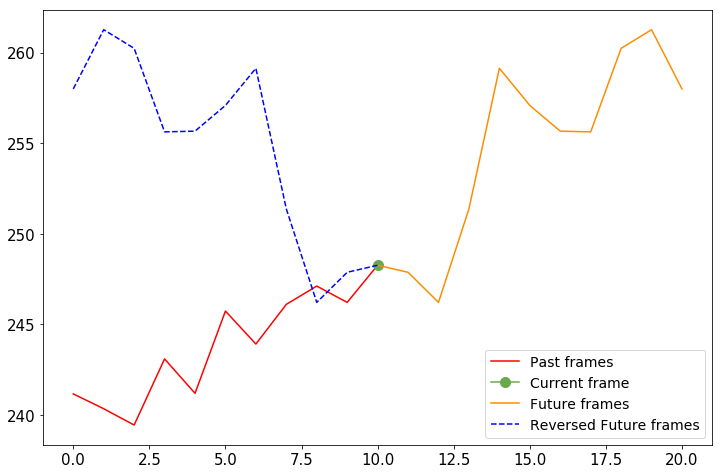

In [246]:
fig = plt.figure(figsize=(12,8))
h1, = plt.plot(list(range(0,11)), p, color='r', label='Past frames')
h2, = plt.plot(10,c,color='#6aa84f',marker='o',markersize=10, label='Current frame')
h3, = plt.plot(list(range(10,21)), f, color='darkorange', label='Future frames')
h4, = plt.plot(list(range(0,11)), rf, linestyle='dashed', color='b', label='Reversed Future frames')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(handles=[h1,h2,h3,h4],fontsize=14)
plt.show()
fig.savefig("past_fut_plot.png")